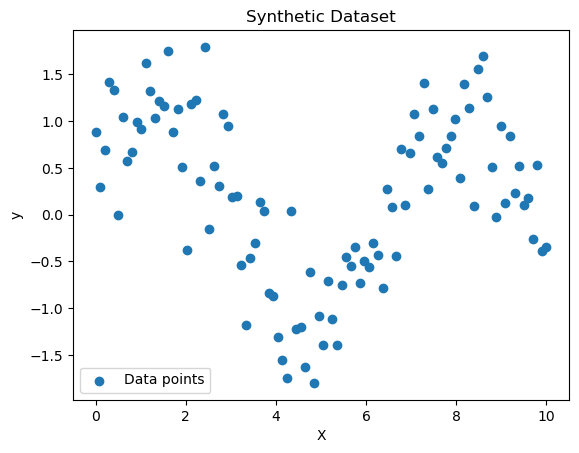

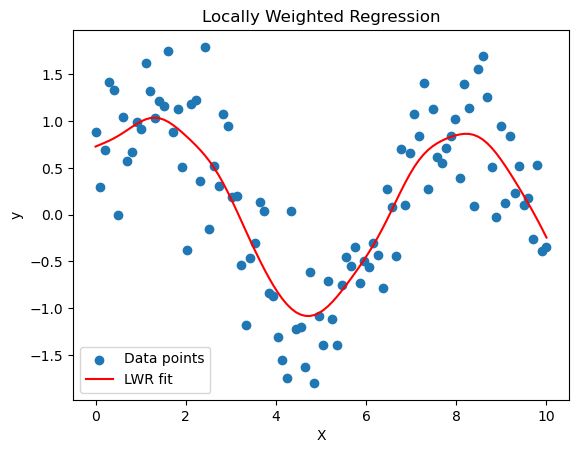

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed(0) 
X = np.linspace(0, 10, 100) 
y = np.sin(X) + np.random.normal(scale=0.5, size=X.shape) 
plt.scatter(X, y, label='Data points') 
plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Synthetic Dataset') 
plt.legend() 
plt.show()

def locally_weighted_regression(X, y, x_query, tau):
    m = X.shape[0] 
    y_pred = np.zeros_like(x_query)
    for i, x_q in enumerate(x_query):
        weights = np.exp(- (X - x_q) ** 2 / (2 * tau ** 2)) 
        W = np.diag(weights) 
        X_ = np.vstack([np.ones(m), X]).T 
        theta = np.linalg.inv(X_.T @ W @ X_) @ X_.T @ W @ y 

        y_pred[i] = np.array([1, x_q]) @ theta 
    return y_pred 


tau = 0.5  

x_query = np.linspace(0, 10, 100) 
y_pred = locally_weighted_regression(X, y, x_query, tau) 

plt.scatter(X, y, label='Data points') 
plt.plot(x_query, y_pred, color='red', label='LWR fit') 
plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Locally Weighted Regression') 
plt.legend() 
plt.show()